<a href="https://www.kaggle.com/code/hzahar/heart-disease-prediction-train-accuracy-99-67?scriptVersionId=133853397" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/personal-key-indicators-of-heart-disease/heart_2020_cleaned.csv


## Reading Dataset

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns
df=pd.read_csv("/kaggle/input/personal-key-indicators-of-heart-disease/heart_2020_cleaned.csv")
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


## Checking Dataset Info

In [3]:
df.shape

(319795, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

## Categorizing Age Groups


In [5]:
df['AgeCategory']=df['AgeCategory'].replace(['18-24','25-29'],'Young')
df['AgeCategory']=df['AgeCategory'].replace(['30-34','35-39','40-44','45-49'],'Adult')
df['AgeCategory']=df['AgeCategory'].replace(['50-54','55-59','60-64','65-69'],'Old')
df['AgeCategory']=df['AgeCategory'].replace(['70-74','75-79','80 or older'],'Very Old')

In [6]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


## Checking Null Values

In [7]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

## Checking Duplicates

In [8]:
df.duplicated().sum()


35830

## Dropping Duplicates

In [9]:
df.drop_duplicates(inplace=True)

## Visualizing Data Distribution

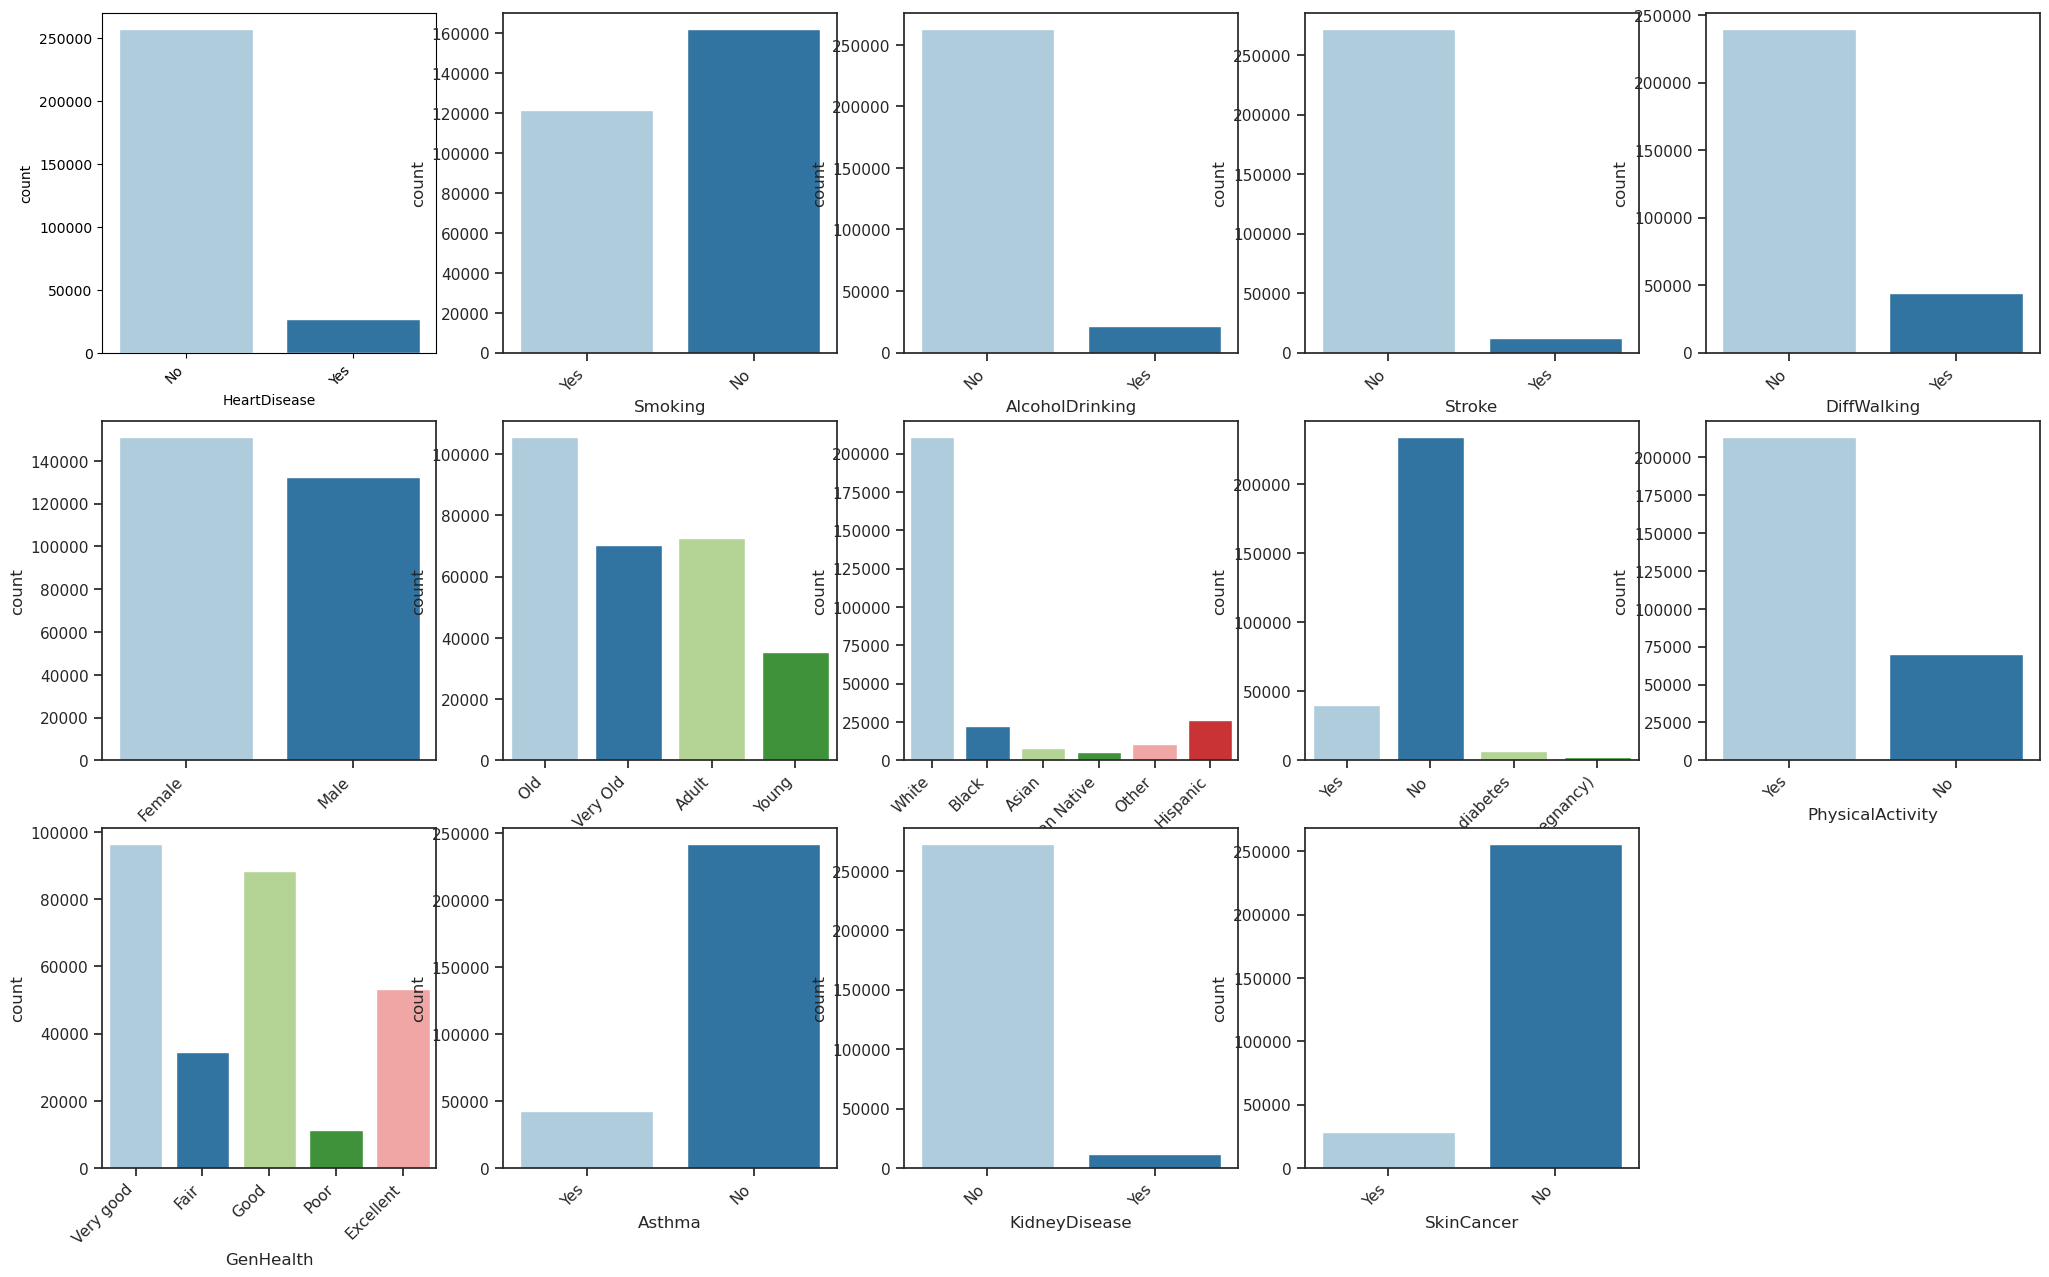

In [10]:
categorical_features = df.select_dtypes(include=[object])

plt.figure(figsize = (25,15))
for i, feature in enumerate(categorical_features):
      plt.subplot(3,5,i + 1)
      sns.set(palette='Paired')
      sns.set_style("ticks")
      ax = sns.countplot(x = feature, data = df)#, hue = 'Stroke')#, color='#221C35')
      ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

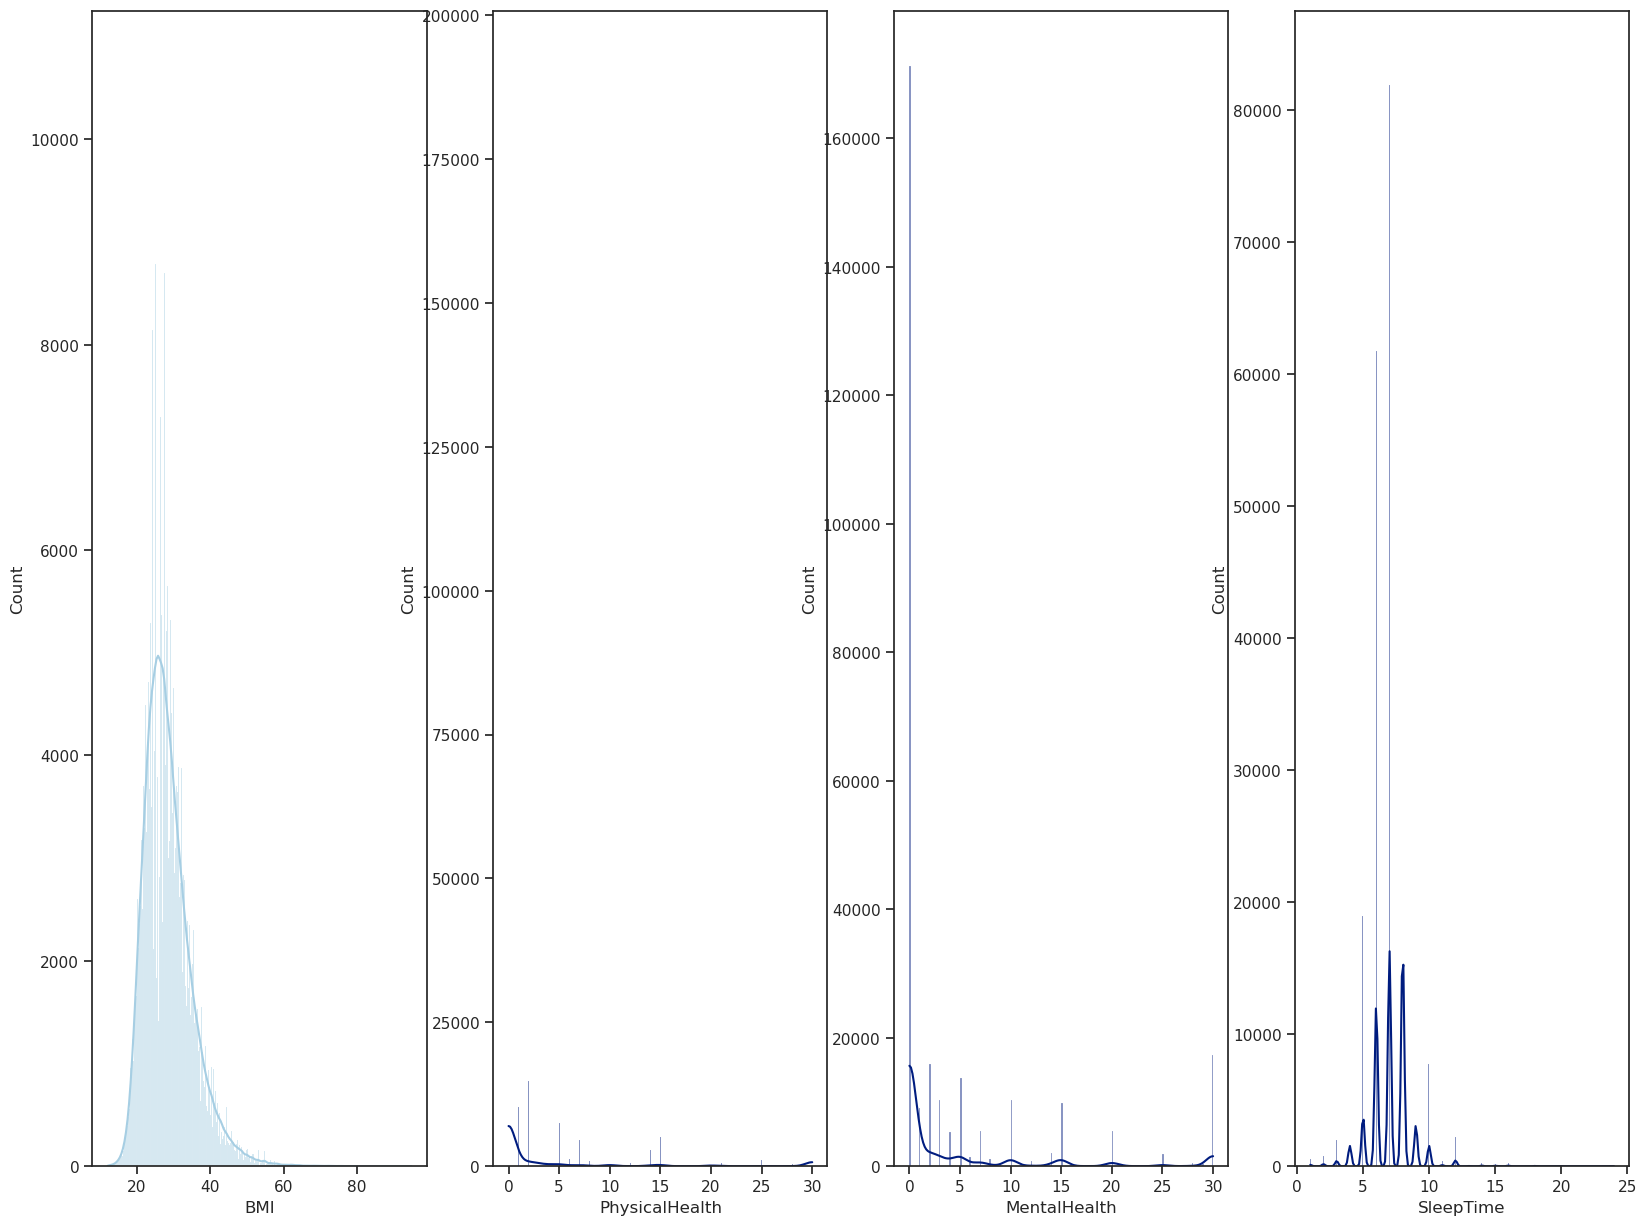

In [11]:
numeric_features = df.select_dtypes(include=[np.number])

plt.figure(figsize = (25,15))
for i, feature in enumerate(numeric_features.columns):
    plt.subplot(1,5,i + 1)
    sns.set(palette='dark')
    sns.set_style("ticks")
    sns.histplot(df[feature],kde=True)
    plt.xlabel(feature)
    plt.ylabel("Count")

## Raito of Heart Disease

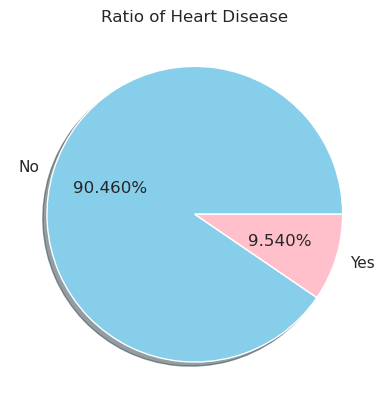

In [12]:
plt.pie(x = df['HeartDisease'].value_counts() ,autopct='%1.3f%%' ,labels=['No', 'Yes'], colors=['skyblue', 'pink'], shadow=True)
plt.title('Ratio of Heart Disease')
plt.show()

In [13]:
# sns.scatterplot(df,x="BMI",y="SleepTime")

## Label Encoding

In [14]:
from sklearn.preprocessing import LabelEncoder
# label=LabelEncoder()
# for col in df:
#     df[col]=label.fit_transform(df[col])
# df.head()

# df_org = df.copy()
# df_enc_mix = df_org.copy()
# le = LabelEncoder()

# # Get a list of categorical column names
# categorical_cols = df_enc_mix.select_dtypes(include=['object', 'category']).columns.tolist()

# for col in categorical_cols:
#     if len(df_enc_mix[col].unique()) <= 2:
#         # label encode binary variables
#         df_enc_mix[col] = le.fit_transform(df_enc_mix[col])
#     else:
#         # one-hot encode non-binary variables
#         df_enc_mix = pd.get_dummies(df_enc_mix, columns=[col])

# df_enc_mix.head()


le = LabelEncoder()

# Get a list of categorical column names
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

for col in categorical_cols:
    if len(df[col].unique()) <= 2:
        # label encode binary variables
        df[col] = le.fit_transform(df[col])
    else:
        # one-hot encode non-binary variables
        df = pd.get_dummies(df, columns=[col])

df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,PhysicalActivity,...,Race_White,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,0,16.60,1,0,0,3.0,30.0,0,0,1,...,1,0,0,1,0,0,0,0,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,1,...,1,1,0,0,0,0,0,0,0,1
2,0,26.58,1,0,0,20.0,30.0,0,1,1,...,1,0,0,1,0,0,1,0,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,0,...,1,1,0,0,0,0,0,1,0,0
4,0,23.71,0,0,0,28.0,0.0,1,0,1,...,1,1,0,0,0,0,0,0,0,1


In [15]:
y = df.iloc[:, 0]  # Assuming the first column is the target variable
X = df.iloc[:, 1:]  # Selecting all columns except the first column
X

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,PhysicalActivity,SleepTime,...,Race_White,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,16.60,1,0,0,3.0,30.0,0,0,1,5.0,...,1,0,0,1,0,0,0,0,0,1
1,20.34,0,0,1,0.0,0.0,0,0,1,7.0,...,1,1,0,0,0,0,0,0,0,1
2,26.58,1,0,0,20.0,30.0,0,1,1,8.0,...,1,0,0,1,0,0,1,0,0,0
3,24.21,0,0,0,0.0,0.0,0,0,0,6.0,...,1,1,0,0,0,0,0,1,0,0
4,23.71,0,0,0,28.0,0.0,1,0,1,8.0,...,1,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,27.41,1,0,0,7.0,0.0,1,1,0,6.0,...,0,0,0,1,0,0,1,0,0,0
319791,29.84,1,0,0,0.0,0.0,0,1,1,5.0,...,0,1,0,0,0,0,0,0,0,1
319792,24.24,0,0,0,0.0,0.0,0,0,1,6.0,...,0,1,0,0,0,0,0,1,0,0
319793,32.81,0,0,0,0.0,0.0,0,0,0,12.0,...,0,1,0,0,0,0,0,1,0,0


> ## **Training Model:** Random Forest Classifier

In [16]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV
from imblearn.over_sampling import SMOTE

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [18]:
rf_classifier = RandomForestClassifier(random_state=42)

In [19]:
rf_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test_scaled)

# Calculate the train accuracy of the classifier
tr_accuracy = rf_classifier.score(X_train_scaled, y_train)

# Calculate the accuracy of the classifier
ts_accuracy = accuracy_score(y_test, y_pred)

print("Train Accuracy:", f'{round(tr_accuracy, 4) * 100}%')
print("Test Accuracy:", f'{round(ts_accuracy, 4) * 100}%')

Train Accuracy: 99.44%
Test Accuracy: 88.49000000000001%


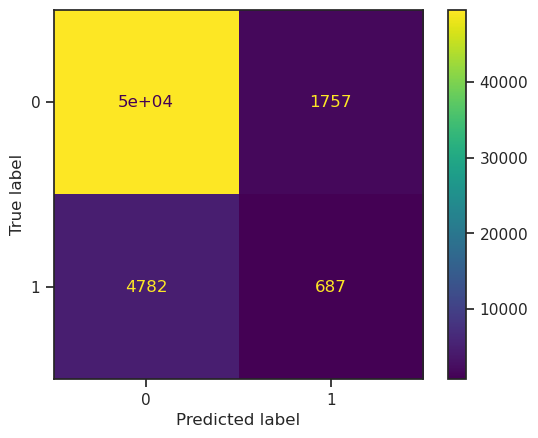

In [20]:
from sklearn.metrics import confusion_matrix, auc, roc_curve, precision_score, recall_score
c_matrix = confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = c_matrix)

cm_display.plot()
plt.show()

## Handling Class Imbalance (Oversampling)

In [21]:
# param_grid = {'n_neighbors': [55, 60]}

# # Create a k-nearest neighbors classifier
# knn = KNeighborsClassifier()

# # Use grid search to find the optimal value of k
# grid_search = GridSearchCV(knn, param_grid, cv=5)
# grid_search.fit(X, y)

# # Print the best parameter and score
# best_param = grid_search.best_params_
# best_score = grid_search.best_score_

# print(f"Best parameter: {best_param}")
# print(f"Best score: {round(best_score, 2)}")

In [22]:
oversample = SMOTE(k_neighbors=55, random_state=42)
print(f"{oversample}")

SMOTE(k_neighbors=55, random_state=42)


In [23]:
# handling the class imbalance
X_features_smoted, y_target_smoted = oversample.fit_resample(X, y)
y_target_smoted = pd.Series(y_target_smoted)

print(f'No. of records before using SMOTE\n{y.value_counts()}\n')
print(f'No. of records after using SMOTE\n{y_target_smoted.value_counts()}')

No. of records before using SMOTE
0    256876
1     27089
Name: HeartDisease, dtype: int64

No. of records after using SMOTE
0    256876
1    256876
Name: HeartDisease, dtype: int64


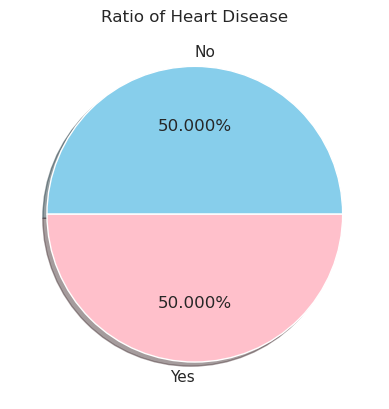

In [24]:
plt.pie(x = y_target_smoted.value_counts() ,autopct='%1.3f%%' ,labels=['No', 'Yes'], colors=['skyblue', 'pink'], shadow=True)
plt.title('Ratio of Heart Disease')
plt.show()

> ## **Training Model:** Random Forest Classifier (Smoted)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_features_smoted, y_target_smoted, test_size=0.2, random_state=42)

# cv = KFold(n_splits=10, random_state=None,shuffle=False)
# params_rf = {"criterion":['gini','entropy']}
# rf_cv = GridSearchCV(rf_classifier,
#                         param_grid = params_rf,
#                         cv = cv,
#                         n_jobs = -1
#                         verbose = 1)

# Perform feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
rf_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test_scaled)

# Calculate the train accuracy of the classifier
tr_accuracy = rf_classifier.score(X_train_scaled, y_train)

# Calculate the accuracy of the classifier
ts_accuracy = accuracy_score(y_test, y_pred)

print("Train Accuracy:", f'{round(tr_accuracy, 4) * 100}%')
print("Test Accuracy:", f'{round(ts_accuracy, 4) * 100}%')

Train Accuracy: 99.67%
Test Accuracy: 89.5%


In [27]:
# print("Best params: ", rf_cv.best_params_)

## **Confusion Matrix:** Random Forest Classifier

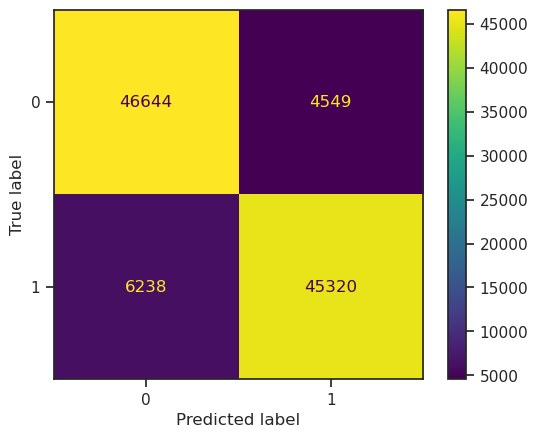

In [28]:
from sklearn.metrics import confusion_matrix
c_matrix = confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = c_matrix)

cm_display.plot()
plt.show()

## **Classification Report:** Random Forest Classification

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.91      0.90     51193
           1       0.91      0.88      0.89     51558

    accuracy                           0.90    102751
   macro avg       0.90      0.90      0.90    102751
weighted avg       0.90      0.90      0.89    102751



> ## **Training model**: Logistic Regression

In [30]:
lr = LogisticRegressionCV(solver='lbfgs')
X_train, X_test, y_train, y_test = train_test_split(X_features_smoted, y_target_smoted, test_size=0.2, random_state=42)

# params_lr = {
#     'solver' : ['newton-cg', 'lbfgs', 'liblinear'],
#     'penalty' : ['l1'],
#     'Cs' : [100, 10, 1.0, 0.1, 0.01, 0.001]
# }

# lr_cv = GridSearchCV(lr, param_grid = params_lr, refit = True, n_jobs = -1)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
lr.fit(X_train_scaled, y_train)

y_pred = lr.predict(X_test_scaled)

# Calculate the train accuracy of the classifier
tr_accuracy = lr.score(X_train_scaled, y_train)

# Calculate the accuracy of the classifier
ts_accuracy = accuracy_score(y_test, y_pred)

print("Train Accuracy:", f'{round(tr_accuracy, 4) * 100}%')
print("Test Accuracy:", f'{round(ts_accuracy, 4) * 100}%')

Train Accuracy: 85.7%
Test Accuracy: 85.71%


In [32]:
# print("Best params: ", lr_cv.best_params_)

## **Confusion Matrix:** Logistic Regression 

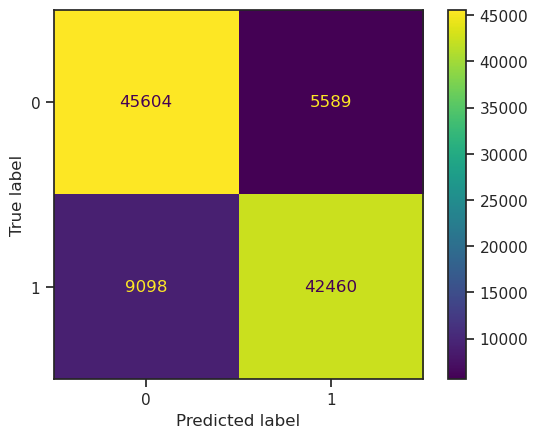

In [33]:
from sklearn.metrics import confusion_matrix

c_matrix = confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = c_matrix)

cm_display.plot()
plt.show()

## **Classification Report:** Logistic Regression

In [34]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86     51193
           1       0.88      0.82      0.85     51558

    accuracy                           0.86    102751
   macro avg       0.86      0.86      0.86    102751
weighted avg       0.86      0.86      0.86    102751



> ## **Training Model:** Naive Bayes Classifier

In [35]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold

g_nb = GaussianNB()
# cv = KFold(n_splits=10, random_state=None,shuffle=False)
# params_nb = {'var_smoothing': np.logspace(1,10, num=100)}
# g_nb_cv = GridSearchCV(g_nb, param_grid = params_nb, cv = cv, n_jobs = -1 verbose = 1)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_features_smoted, y_target_smoted, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
g_nb.fit(X_train_scaled, y_train)

y_pred = g_nb.predict(X_test_scaled)

# Calculate the train accuracy of the classifier
tr_accuracy = g_nb.score(X_train_scaled, y_train)

# Calculate the accuracy of the classifier
ts_accuracy = accuracy_score(y_test, y_pred)

print("Train Accuracy:", f'{round(tr_accuracy, 4) * 100}%')
print("Test Accuracy:", f'{round(ts_accuracy, 4) * 100}%')

Train Accuracy: 77.97%
Test Accuracy: 78.01%


In [38]:
# print("Best params: ", g_nb_cv.best_params_)

## **Confusion Matrix:** Naive Bayes Classifier

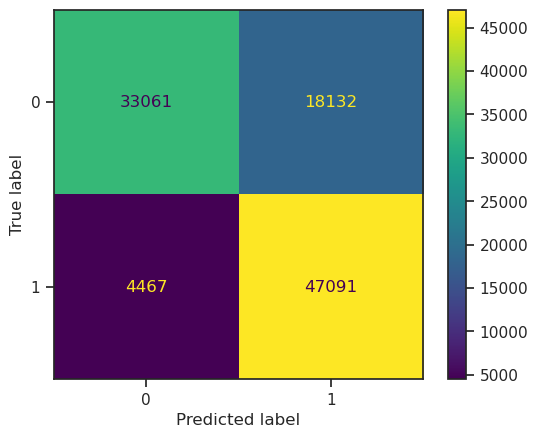

In [39]:
from sklearn.metrics import confusion_matrix

c_matrix = confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = c_matrix)

cm_display.plot()
plt.show()

## **Classification Report:** Naive Bayes Classifier

In [40]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.65      0.75     51193
           1       0.72      0.91      0.81     51558

    accuracy                           0.78    102751
   macro avg       0.80      0.78      0.78    102751
weighted avg       0.80      0.78      0.78    102751



> ## **Training Mode:** Decision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier
d_t = DecisionTreeClassifier()

# cv = KFold(n_splits=10, random_state=None,shuffle=False)
# params_dt = {"criterion":['gini','entropy'], "max_depth": [100], "random_state": [1024]}
# d_t_cv = GridSearchCV( d_t,
#                             param_grid = params_dt,
#                             cv = cv,
#                             n_jobs = -1,
#                             verbose = 1 )

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_features_smoted, y_target_smoted, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [43]:
d_t.fit(X_train_scaled, y_train)

y_pred = d_t.predict(X_test_scaled)

# Calculate the train accuracy of the classifier
tr_accuracy = d_t.score(X_train_scaled, y_train)

# Calculate the accuracy of the classifier
ts_accuracy = accuracy_score(y_test, y_pred)

print("Train Accuracy: ", tr_accuracy)
print("Test Accuracy: ", ts_accuracy)

Train Accuracy:  0.9967226357113487
Test Accuracy:  0.8719915134645891


In [44]:
# print("Best params: ", d_t_cv.best_params_)

## **Confusion Matrix:** Decision tree

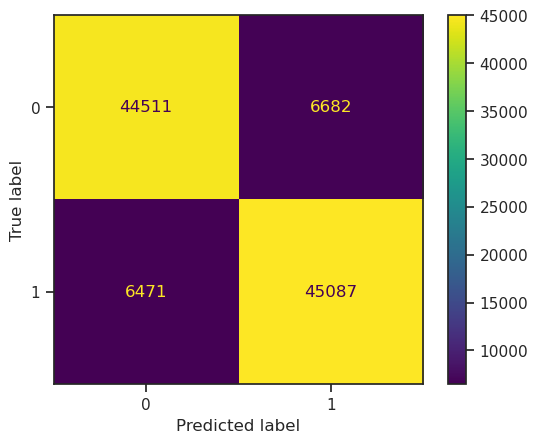

In [45]:
from sklearn.metrics import confusion_matrix

c_matrix = confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = c_matrix)

cm_display.plot()
plt.show()

## **Classification Report:** Decision Tree

In [46]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87     51193
           1       0.87      0.87      0.87     51558

    accuracy                           0.87    102751
   macro avg       0.87      0.87      0.87    102751
weighted avg       0.87      0.87      0.87    102751



## Comparing Algorithms

In [47]:
MLA = [
    rf_classifier,
    lr,
    g_nb,
    d_t
]

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_features_smoted, y_target_smoted, test_size=0.2, random_state=42)

# Perform feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)


row_index = 0

for alg in MLA:
    predicted = alg.fit(X_train_scaled, y_train).predict(X_test_scaled)
    fp, tp, th = roc_curve(y_test, predicted)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Train Accuracy'] = round(alg.score(X_train_scaled, y_train), 4) * 100
    MLA_compare.loc[row_index, 'MLA Test Accuracy'] = round(alg.score(X_test_scaled, y_test), 4) * 100
    MLA_compare.loc[row_index, 'MLA Precission'] = round(precision_score(y_test, predicted), 4) * 100
    MLA_compare.loc[row_index, 'MLA Recall'] = round(recall_score(y_test, predicted), 4) * 100
    MLA_compare.loc[row_index, 'MLA AUC'] = round(auc(fp, tp), 4) * 100
    row_index+=1

In [49]:
MLA_compare.sort_values(by = ['MLA Train Accuracy'], ascending = False, inplace = True)
MLA_compare

,MLA Name,MLA Train Accuracy,MLA Test Accuracy,MLA Precission,MLA Recall,MLA AUC
0,RandomForestClassifier,99.67,89.50,90.88,87.90,89.51
3,DecisionTreeClassifier,99.67,87.26,87.13,87.53,87.26
1,LogisticRegressionCV,85.70,85.71,88.37,82.35,85.72
2,GaussianNB,77.97,78.01,72.20,91.34,77.96


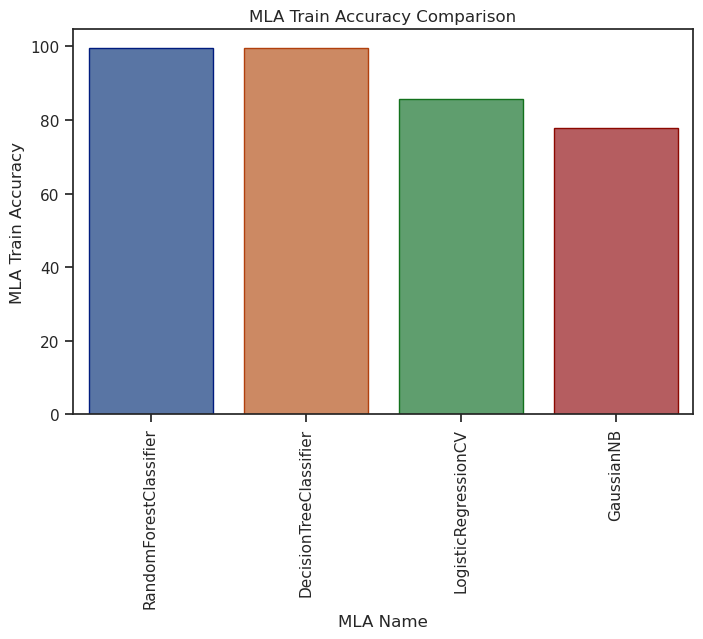

In [50]:
# MLA_acc_compare = MLA_compare.copy().loc[:, "MLA Train Accuracy":] * 100
# MLA_acc_compare["MLA Name"] = MLA_compare.copy().loc[:, :"MLA Name"]
# cols = list(MLA_acc_compare.columns)
# cols = [cols[-1]] + cols[:-1]
# MLA_acc_compare = MLA_acc_compare[cols]

plt.subplots(figsize=(8,5))
sns.barplot(x="MLA Name", y="MLA Train Accuracy",data=MLA_compare,palette='deep',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('MLA Train Accuracy Comparison')
plt.show()